<font size="5" color="red">ch3. 분류분석</font>
# 1절. 분류분석 개요

- scikit-learn 공식 사이트 : http://scikit-learn.org
- scikit-learn 도큐먼트 : http://scikit-learn.org/stable

``` pip install scikit-learn```

## 1-1 tensorflow(DL)나 scikit-learn(ML) 샘플용 데이터 셋 접근방법

### load 계열(패키지 내 데이터를 갖고 있음)

### fetch 계열(패키지가 데이터를 갖고 있지 않고 함수 호출시 인터넷 다운)

### make 계열
    - make_classification() : 분류분석용 데이터 생성
    - make_regression() : 회귀분석용 데이터 생성

In [1]:
# load 계열
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

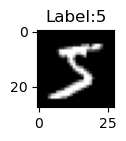

In [2]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Label:{y_train[0]}')
plt.show()

In [3]:
# fetch 계열
from sklearn.datasets import fetch_openml #iris, mnist, wine, fashion-MNIST
import numpy as np
mnist = fetch_openml(name='mnist_784', parser='auto', version=1, as_frame=False)

C:\Users\201-09\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:91: UserWarning: A network error occurred while downloading https://openml.org/api/v1/json/data/list/data_name/mnist_784/limit/2/data_version/1. Retrying...
  warn(


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>

In [ ]:
X, y = mnist.data, mnist.target.astype(np.uint8) # y는 unsigned int로 변환
X.shape, y.shape

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.title(f'Label:{y[0]}')
plt.show()

In [7]:
iris = fetch_openml(name='iris', version=1)
X, y = iris.data, iris.target
y[0]

C:\Users\201-09\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:91: UserWarning: A network error occurred while downloading https://openml.org/api/v1/json/data/list/data_name/iris/limit/2/data_version/1. Retrying...
  warn(


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>

# 2절. 분류분석의 종류(pt 8)
## 2-1 확률적 모형
- 주어진 데이터에 대해 각 클래스(그룹)가 정답일 조건부 확률을 계산하는 모형
- 함수 : predict(값), predict_proba()-각분류클래스별 확률, predict_log_proba()-확률의로그값

### 1) 확률적 생성 모형 
 - 베이즈 정리를 사용한 확률적 생성 모형
 ```
 ex) sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis(이차판별분석 모형)
     sklearn.naive_bayes.MultinomialNB(나이브 베이지안)
 ```
### 2) 확률적 판별모형
 - 조건부 확률 함수를 추정하는 확률적 판별 모형
 ```
 ex) sklearn.linear_model.LogisticRegression(로지스틱회귀분석)
     sklearn.tree.DecisionTreeClassifier(의사결정나무)
 ```

## 2-2 판별함수 모형
- 주어진 데이터를 클래스에 따라 서로 다른 영역으로 나누는 경계면을 찾은 후 이 경계면으로부터 주어진 데이터가 어느 위치에 있는지를 계산하는 판별함수를 이용하는 모형
- 함수 : predict(값), decision_function(값)-어떤클래스로분류되는정도
```
    ex)sklearn.linear_model.Perceptron(퍼셉트론)
       sklearn.svm.SVC(서포트 벡터 머신)
       sklearn.neural_network.MLPClassifier(다중신경망) 
```
=> RandomForest, XGBoost, LGBM, CatBoost등의 앙상블 모형이 더 많이 사용

# 3절. 분류분석모형1. 확률적 생성 모형
## 3-1. QDA(Quadratic Discriminant Analysis) ; 이차판별분석법
- 독립변수 실수이고 다변수 정규분포라고 가정(pt. 11~12)

In [7]:
# 샘플데이터 생성
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
from sklearn.datasets import make_classification
X, y = make_classification(#n_samples=100,
                           n_features=2, # 독립변수 갯수
                           n_informative=2, # 종속변수에 영향을 미치는 독립변수 갯수 
                           n_redundant=0, # 독립변수 중 독립변수끼리 선형관계가 있는 수 
                           n_classes=2,   # 종속변수의 클래스 수 
                           n_clusters_per_class=1, # 클래스 당 군의 갯수 
                           random_state=9) # random seed값
X.shape, y.shape

((100, 2), (100,))

In [8]:
import pandas as pd
import numpy as np
print(pd.Series(y).unique())
print(np.unique(y))

[0 1]
[0 1]


In [9]:
X0 = X[y==0] # 0인 그룹의 독립변수
X1 = X[y==1] # 1인 그룹의 독립변수

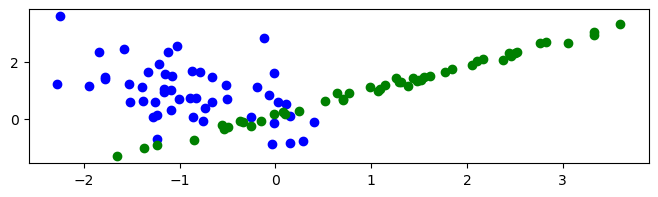

In [10]:
plt.figure(figsize=(8,2))
plt.scatter(X0[:,0], X0[:,1], c='b')
plt.scatter(X1[:,0], X1[:,1], c='g')

In [11]:
len(X0), len(X1)

(50, 50)

In [12]:
# 대칭구조를 만들기
X[y==1] = -X[y==0]

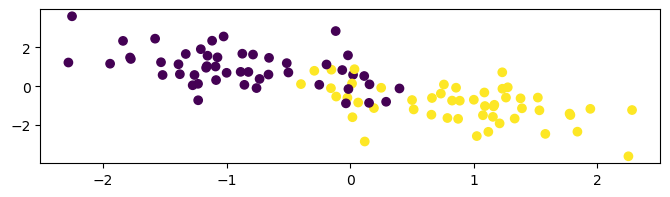

In [13]:
plt.figure(figsize=(8,2))
plt.scatter(X[:,0], X[:,1], c=y)

In [14]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

In [15]:
x = [[0,0]]
model.predict(x) # 예측

array([0])

In [16]:
model.predict_proba(x) # 각 class별 확률

array([[0.5, 0.5]])

In [17]:
model.predict_log_proba(x) # 확률의 로그값

array([[-0.69314718, -0.69314718]])

In [18]:
model.classes_

array([0, 1])

In [19]:
model.score(X, y) # accuracy

0.88

In [20]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat, colnames=['예측'], rownames=['실제'])

예측,0,1
실제,,
0,44,6
1,6,44


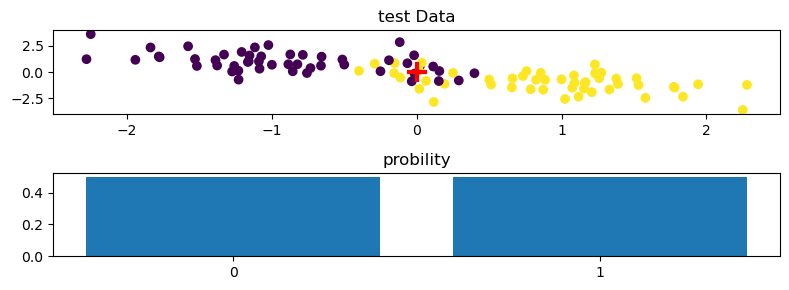

In [21]:
# 교안 pt. 13
plt.figure(figsize=(8,3))
x = [[0,0]]
p = model.predict_proba(x) #[[0.5,0.5]]
plt.subplot(211)
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(x[0][0], x[0][1], c='r', marker='+', s=200, lw=3)
plt.title('test Data')
plt.subplot(212)
plt.bar(model.classes_, p[0])
plt.xticks(model.classes_)
plt.title('probility')
plt.tight_layout()
plt.show()

[[0.83544581 0.16455419]]


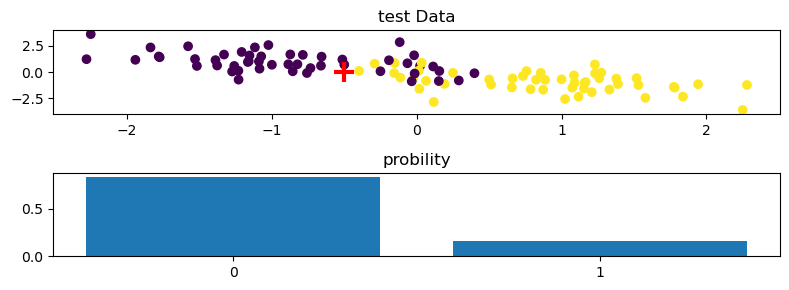

In [22]:
plt.figure(figsize=(8,3))
x = [[-0.5,0]]
p = model.predict_proba(x)
print(p)
plt.subplot(211)
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(x[0][0], x[0][1], c='r', marker='+', s=200, lw=3)
plt.title('test Data')
plt.subplot(212)
plt.bar(model.classes_, p[0])
plt.xticks(model.classes_)
plt.title('probility')
plt.tight_layout()
plt.show()

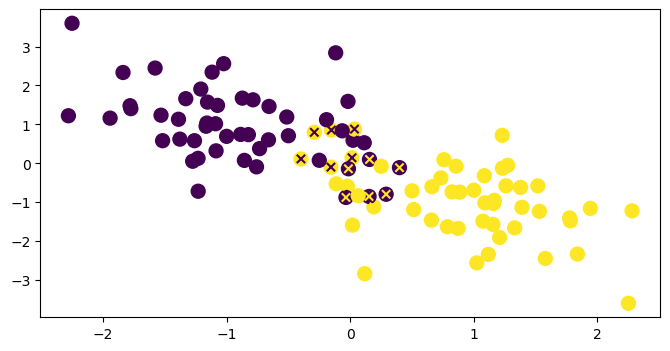

In [23]:
y_hat = model.predict(X)
plt.figure(figsize=(8,4))
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.scatter(X[:,0], X[:,1], c=y_hat, marker='x')
plt.show()

## 3-2 나이브 베이지안 모형

In [24]:
# 데이터 준비
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1]
y = iris.species
# 모형(모델) 만들기
from sklearn.naive_bayes import MultinomialNB, GaussianNB
model = MultinomialNB().fit(X.values, y)
# model.fit(X, y)
print(X.shape, y.shape, type(X), type(y))

(150, 4) (150,) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [25]:
# 예측하기
test_X = [[5.1, 3.5, 1.4, 0.2]]
print(model.predict(test_X))
print(model.classes_)
print(model.predict_proba(test_X))

['setosa']
['setosa' 'versicolor' 'virginica']
[[0.75199536 0.16092948 0.08707516]]


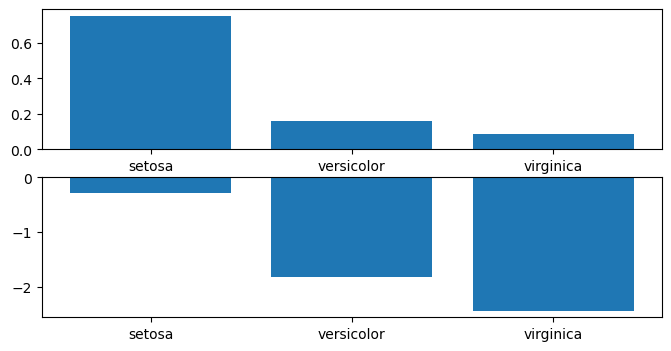

In [26]:
plt.figure(figsize=(8,4))
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(test_X)[0])
plt.show()

# 4절. 분류분석모형2. 확률적 판별모형
## 4-1 로지스틱 회귀분석
- 종속변수가 이항분포

In [27]:
X, y = make_classification(n_samples=100,
                           n_features=1, # 독립변수 수
                           n_redundant=0, # 종속변수에 영향을 미치지 않는 독립변수 수
                           n_informative=1, # 종속변수에 영향을 미치는 독립변수 수
                           n_clusters_per_class=1, # 클래스당 서브 클래스 수
                           n_classes=2,
                           random_state=1)
X.shape, y.shape

((100, 1), (100,))

In [28]:
np.unique(y), np.mean(y)

(array([0, 1]), 0.5)

In [29]:
# 모형(모델)생성
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)

In [30]:
xx = np.linspace(-3, 3, 100)
# xx 값을 predict하기 위해 축추가 : [[-3], [-2.93], ...]
XX = xx.reshape(-1, 1)
XX = xx[:, None]
XX = np.expand_dims(xx, axis=1)
XX = xx[:, np.newaxis]
print('축 증가 결과 shape :', XX.shape)
prob = model.predict_proba(XX) # 각 변수의 0 확률, 1 확률

축 증가 결과 shape : (100, 1)


In [31]:
prob0 = prob[:, 0] # 각 변수의 0일 확률
prob1 = prob[:, 1] # 각 변수의 1일 확률

[0.73082662 0.26917338]


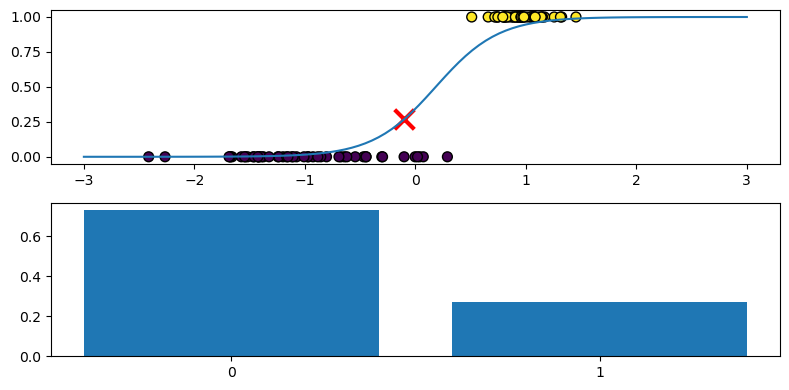

In [32]:
test_x = [[-0.1]]
prob_x = model.predict_proba(test_x)
print(prob_x[0])

plt.figure(figsize=(8,4))
plt.subplot(211)
plt.plot(xx, prob1)
plt.scatter(test_x[0], prob_x[0][1], c='r', marker='x', s=200, lw=3)
plt.scatter(X, y, c=y, s=50, edgecolors='k')
plt.subplot(212)
plt.bar(model.classes_, prob_x[0])
plt.xticks(model.classes_)
plt.tight_layout()
plt.show()

## 4-2 의사결정나무
- 분류와 회귀에 모두 사용될 수 있으므로 CART(classification And Regression Tree)라고도 함
- ★ 종속변수에 영향을 주는 독립변수의 범주를 찾는데 목적

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target_names[iris.target]
feature_names = [name[:-5] for name in iris.feature_names[2:]]

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', # 분류품질기준
                                  max_depth=1,
                                  random_state=0)
dt_model.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [40]:
test_X = [[1.4, 0.2]]
print('예측 :',dt_model.predict(test_X))
print('클래스별 확률값 :', dt_model.predict_proba(test_X))

예측 : ['setosa']
클래스별 확률값 : [[1. 0. 0.]]


In [45]:
#분류과정을 트리로 시각화 : 어떤 클래스에서 어떤 독립변수가 가장 큰 영향을 주는지 탐색
import io
# conda install graphviz (의사결정 나무 그래프 생성 도구)
# pip install pydot(graphviz로 생성된 데이터를 이미지로 변환하는 도구)
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

def draw_decision_tree(model, feature_names):
    # 메모리 버퍼 생성
    dot_buf = io.StringIO() 
    # 모델을 트리로 시각화
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    # 버퍼에 저장된 문자를 객체로 생성 -> 이미지로 변환
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

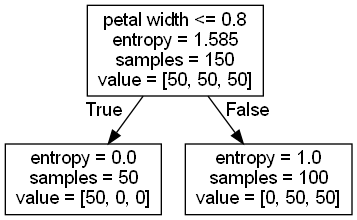

In [46]:
draw_decision_tree(dt_model, feature_names)

In [52]:
data = load_iris()
X = data.data[:,2:]
y = data.target
feature_names = [name[:-5] for name in data.feature_names[2:]]
dt_model = DecisionTreeClassifier(criterion='entropy', # 분류품질기준
                                  max_depth=1,
                                  random_state=0).fit(X,y)

In [55]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

def plot_decision_regions(X, y, model, title):
    species = ['setosa', 'versicolor', 'virginica']
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
            c=[cmap(idx)], marker=markers[idx], s=80, label=species[cl])
        
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

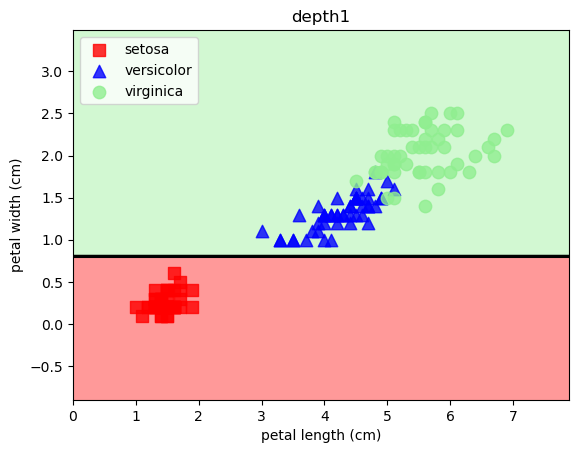

In [56]:
plot_decision_regions(X, y, dt_model, 'depth1')

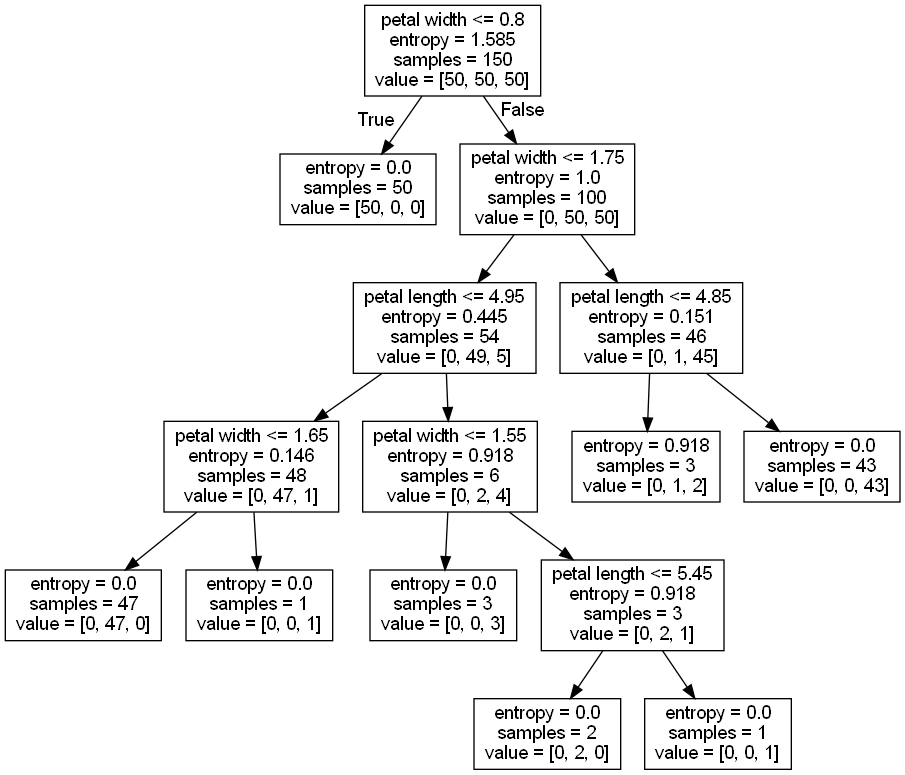

In [57]:
dt_model5 = DecisionTreeClassifier(criterion='entropy', # 분류품질기준
                                  max_depth=5,
                                  random_state=0).fit(X,y)
draw_decision_tree(dt_model5, feature_names)

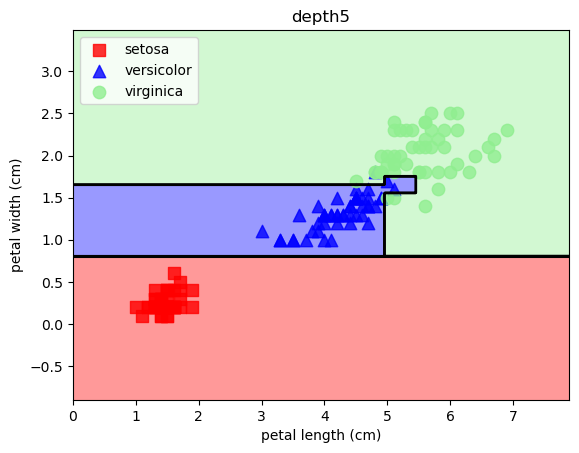

In [59]:
plot_decision_regions(X, y, dt_model5, 'depth5')
plt.show()

# 5절. 분류분석모형3. 판별함수 모형
- predict(), decision_function()
ex. Preceptron, SVC, MLP

## 5-1 Perceptron

In [64]:
iris = load_iris()
idx = (iris.target == 0) | (iris.target == 2)
idx = np.in1d(iris.target, [0,2])

In [65]:
X = iris.data[idx, 0:2]
y = iris.target[idx]
X.shape, y.shape

((100, 2), (100,))

In [67]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=100, # epoch
                   eta0=0.1, # learning rate
                   random_state=1).fit(X,y)

In [70]:
import pandas as pd
y_hat = model.predict(X)
pd.crosstab(y, y_hat, rownames=['실제'], colnames=['예측'])

예측,0,2
실제,,
0,49,1
2,0,50


In [73]:
(y!=y_hat).sum()

1

In [77]:
for idx, (real, hat) in enumerate(zip(y, y_hat)):
    if real != hat:
        print(f'{idx}번째 데이터 {real}의 예측값은 {hat} - 데이터{X[idx]}')

41번째 데이터 0의 예측값은 2 - 데이터[4.5 2.3]


In [83]:
# 축 증가(행)
test_X = X[41].reshape(1,-1)
test_X = X[41][np.newaxis, :]
test_X = X[41][None, :]
test_X = np.expand_dims(X[41], axis=0)
print('테스트 데이터 :',test_X)
print('예측값 :', model.predict(test_X))
print('decision :', model.decision_function(test_X))
# 양수(+) -> 2그룹 영역
# 음수(-) -> 0그룹 영역

테스트 데이터 : [[4.5 2.3]]
예측값 : [2]
decision : [1.24]


In [84]:
test_X = np.expand_dims(X[0], axis=0)
print('테스트 데이터 :',test_X)
print('예측값 :', model.predict(test_X))
print('decision :', model.decision_function(test_X))

테스트 데이터 : [[5.1 3.5]]
예측값 : [0]
decision : [-3.134]


In [85]:
test_X = np.expand_dims(X[99], axis=0)
print('테스트 데이터 :',test_X)
print('예측값 :', model.predict(test_X))
print('decision :', model.decision_function(test_X))

테스트 데이터 : [[5.9 3. ]]
예측값 : [2]
decision : [2.269]


## 5-2 SVC

In [86]:
from sklearn.svm import SVC
model = SVC().fit(X,y)

In [87]:
test_X = np.expand_dims(X[41], axis=0)
print('테스트 데이터 :',test_X)
print('예측값 :', model.predict(test_X))
print('decision :', model.decision_function(test_X))

테스트 데이터 : [[4.5 2.3]]
예측값 : [0]
decision : [-0.72539221]


In [88]:
test_X = np.expand_dims(X[99], axis=0)
print('테스트 데이터 :',test_X)
print('예측값 :', model.predict(test_X))
print('decision :', model.decision_function(test_X))

테스트 데이터 : [[5.9 3. ]]
예측값 : [2]
decision : [0.81675214]


## 5-3 다중퍼셉트론(인공신경망)

In [90]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(50,50,30),
                          max_iter=500).fit(X, y)

In [91]:
pred = mlp_model.predict(X)
pd.crosstab(y, pred, colnames=['예측'], rownames=['실제'])

예측,0,2
실제,,
0,50,0
2,0,50


In [92]:
mlp_model.predict_proba(X[41].reshape(1,-1))

array([[0.55505435, 0.44494565]])

# 6절. 분류모형 성능평가
## 6-1 scikit-learn의 모형평가 방법
- 예측모형.score()
    * 분류의 겨우 accuracy. 회귀의 경우 r제곱(설명력)
- **metrics 패키지 함수**
    * 분류, 회귀, 군집 모형의 평가를 위한 다양한 함수 제공
- scoring 매개변수 및 GridSerchCV 클래스 이용

In [96]:
y_true = [1,1,0,0,2,1,0,2,2]
y_pred = [1,1,0,1,1,0,0,2,2]
pd.crosstab(y_true, y_pred, colnames=['예측'], rownames=['실제'], margins=True)

예측,0,1,2,All
실제,,,,
0,2,1,0,3
1,1,2,0,3
2,0,1,2,3
All,3,4,2,9


In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[2, 1, 0],
       [1, 2, 0],
       [0, 1, 2]], dtype=int64)

## 6-2 혼돈행렬을 이용한 평가
- accuracy, recall(재현율), precision, Specificity(특이도), f1 score, fbeta score, 위양성률

In [97]:
result = pd.read_csv('model_result.csv') # 고객 id, 실제값, 예측값
result.head()

,CUST_ID,y_true,y_pred
0,37,0,0
1,51,0,0
2,60,0,0
3,65,0,0
4,73,0,0


In [98]:
pd.crosstab(result.y_true, result.y_pred, colnames=['예측'], rownames=['실제'], margins=True)
# TN, FP
# FN, TP

예측,0,1,All
실제,,,
0,1613,22,1635
1,81,77,158
All,1694,99,1793


In [101]:
# 정확도 (TN + TP) / (TN+FP+FN+TP)
from sklearn.metrics import accuracy_score
accuracy_score(result.y_true, result.y_pred)

0.9425543781372002

In [103]:
# 민감도 (TP) / (TP + FP) - Positive로 예측한 것중 맞게 예측한 확률
# 민감도가 높으면 고객만족 / 민감도가 낮으면 고객불만
from sklearn.metrics import precision_score
precision_score(result.y_true, result.y_pred)

0.7777777777777778

In [104]:
# 재현율 (TP) / (FN + TP) - 실제 Positive 중 맞게 예측한 확률
# 재현율이 낮으면 회사 cost발생 / 재현율이 높으면 회사 cost 밸생을 줄임
from sklearn.metrics import recall_score
recall_score(result.y_true, result.y_pred)

0.4873417721518987

In [105]:
# 특이도(specificity) - 실제 Negative중 맞게 예측한 확률(反. 재현울)
recall_score(result.y_true, result.y_pred, pos_label=0)

0.9865443425076452

In [106]:
# 위양성율(fallout, FPR) : FP / (TN+FP)
1 - recall_score(result.y_true, result.y_pred, pos_label=0)

0.013455657492354778

In [108]:
# f1 score : recall과 precision의 조화평균
from sklearn.metrics import f1_score
f1_score(result.y_true, result.y_pred)

0.5992217898832685

In [110]:
# fbeta score의 beta=1 : f1 score
# fbeta score의 2>=beta>1 : recall의 가중치가 높게 조정된 f1 score
# fbeta score의 0<=beta<1 : precision의 가중치가 높게 조정된 f1 score
from sklearn.metrics import fbeta_score
print(fbeta_score(result.y_true, result.y_pred, beta=0.5))
print(fbeta_score(result.y_true, result.y_pred, beta=2))
print(fbeta_score(result.y_true, result.y_pred, beta=1))

0.6949458483754513
0.5266757865937073
0.5992217898832685


## 6-3 ROC커브를 이용한 성능비교 -> auc비교

In [111]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,
                           weights=[0.95,0.05], # 0이 95% 1이 5%
                           random_state=5)
X.shape, y.shape

((1000, 20), (1000,))

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [113]:
model1 = LogisticRegression().fit(X, y)
model2 = SVC(gamma=0.0001, C=3000,
             probability=True).fit(X, y)

In [114]:
pred1 = model1.predict(X)
pred2 = model2.predict(X)

In [115]:
pd.crosstab(y, pred1)

col_0,0,1
row_0,,
0,940,3
1,30,27


In [116]:
pd.crosstab(y, pred2)

col_0,0,1
row_0,,
0,940,3
1,30,27


In [119]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thr1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thr2 = roc_curve(y, model2.decision_function(X))

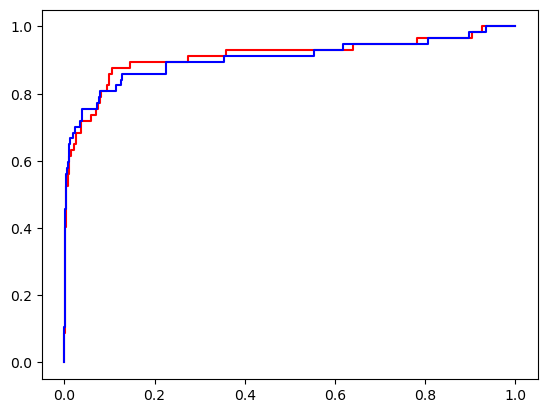

In [121]:
plt.plot(fpr1, tpr1, color='r')
plt.plot(fpr2, tpr2, color='b')

In [122]:
# AUC(Area Under Curve)
# AUC=1 : 완벽한 모델
# AUC=0.5 : 무작위 예측
# AUC<0.5 : 최악
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)